## 1. From the top
Revisamos programas y menciones (por cantidad). Luego los clusters individualmente.

In [ ]:
import glob, pandas as pd, numpy as np
files = list(glob.glob('TEXTOS/TODOS/*.txt'))
textos = [open(fn).read() for fn in files]
files[0]

In [8]:
df = pd.DataFrame(dict(archivo=files, texto=textos))
df['distrito'] = [fn.split('/')[2].split('_')[0] for fn in files]
df['largo'] = df.texto.apply(len)
df['candidato'] = [' '.join(fn.split('/')[2].split('_')[1:])[:-4] for fn in files]
df.head()

,archivo,texto,distrito,largo,candidato
0,TEXTOS/TODOS/D28_JUAN_CARLOS_KALAZICH_SANTANA.txt,''\n''\n''\n''\n''\n''\n''\n''\n''\n''\n''\n''...,D28,39,JUAN CARLOS KALAZICH SANTANA
1,TEXTOS/TODOS/D4_PAMELA_VARGAS_TOLEDO.txt,(' \n'\n 'Por una nueva constitución ecológica...,D4,45269,PAMELA VARGAS TOLEDO
2,TEXTOS/TODOS/D23_ANA_MARIA_VERA_HARO.txt,(' \n'\n ' \n'\n 'Propuesta programática const...,D23,43797,ANA MARIA VERA HARO
3,TEXTOS/TODOS/D16_PAMELA_ANDREA_MORALES_ROLDAN.txt,('VAMOS CON TODO \n'\n 'EJES PROGRAMÁTICOS \n'...,D16,22001,PAMELA ANDREA MORALES ROLDAN
4,TEXTOS/TODOS/D1_ROMINA_ALEJANDRA_LE_BLANC_AMPU...,('PROGRAMA CANDIDATA A CONSTITUYENTE \n'\n 'DI...,D1,10507,ROMINA ALEJANDRA LE BLANC AMPUERO


In [15]:
from util import *
cdf=sql('SELECT * FROM candidatos')
xdf=df.merge(cdf, on='candidato').drop(['archivo','distrito_y','programa'],axis=1)
xdf.sample(10)

,texto,distrito_x,largo,candidato,lista,partido
1078,(' Comisión Constitucional PPD | Borrador de ...,D6,112783,MARICEL MARTINEZ VICENCIO,LISTA DEL APRUEBO,PARTIDO POR LA DEMOCRACIA
45,('P. 1\n'\n 'BASES CONSTITUCIONALES DE EVÓPOLI...,D17,47595,BARBARA REBOLLEDO AGUIRRE,VAMOS POR CHILE,INDEPENDIENTES
1099,('CUATRO EJES FUNDAMENTALES \n'\n 'La existenc...,D17,26596,ROSANNA GARCIA CHEVECICH,VAMOS POR CHILE,INDEPENDIENTES
1108,''\n''\n,D4,6,JORGE ALFONSO FLORES NAVEA,APRUEBO DIGNIDAD,INDEPENDIENTES
1045,(' \n'\n ' \n'\n 'CANDIDATURA \n'\n 'CADUDZZI ...,D16,35573,CADUDZZI OSVALDO SALAS VERA,CORRIENTES INDEPENDIENTES (D16),INDEPENDIENTES
98,('Nuestro programa \n'\n 'Durante octubre y no...,D13,10365,EMILIA IGNACIA VILLALOBOS TASSARA,PARTIDO DE TRABAJADORES REVOLUCIONARIOS,PARTIDO TRABAJADORES REVOLUCIONARIOS
1239,('Programa Constituyente Popular de las y los ...,D6,4525,NIBALDO GABRIEL PINTO SILVA,PARTIDO UNION PATRIOTICA,PARTIDO UNION PATRIOTICA
255,'\xa0\n\xa0\nPROGRAMA\xa0\xa0\nCONVENCIONALES ...,D13,149534,DANIEL FRANCISCO ANDRADE SCHWARZE,APRUEBO DIGNIDAD,REVOLUCION DEMOCRATICA
52,(' \n'\n 'PROGRAMA POLÍTICO \n'\n 'DESDE AYSÉN...,D27,26747,CECILIO ALIER AGUILAR GALINDO,"A PULSO, POR EL BUEN VIVIR (D27)",INDEPENDIENTES
219,''\n(' \n'\n '2 \n'\n ' \n'\n ' \n'\n 'INDICE ...,D20,82119,LUIS IGNACIO PEREZ DIAZ,ASAMBLEA POPULAR CONSTITUYENTE (D20),INDEPENDIENTES


In [33]:
kw = pd.read_csv('keywords.txt', names=['palabra'])
kw['palabra'] = kw.palabra.apply(lambda p: p.split('\t')[1])
kw.head()

,palabra
0,Agua
1,Naturaleza
2,Derecho humano al agua
3,Derecho al agua
4,Derecho de agua


In [45]:
import re
for word in kw.palabra:
    xdf[word] = xdf.texto.apply(lambda t: len(list(re.finditer(word.lower(), t))))
xdf.head()[[c for c in xdf.columns[1:]]]

,distrito_x,largo,candidato,lista,partido,Agua,Naturaleza,Derecho humano al agua,Derecho al agua,Derecho de agua,...,Derechos de la naturaleza,Derecho Ambiental,Cuenca,Privatización,Derecho de propiedad,Patrimonio Ambiental,recursos naturales,patrimonio ambiental,cuenca,bien nacional de uso público
0,D28,39,JUAN CARLOS KALAZICH SANTANA,REGIONALISMO CIUDADANO INDEPENDIENTE (D28),INDEPENDIENTES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D4,45269,PAMELA VARGAS TOLEDO,PARTIDO ECOLOGISTA VERDE,PARTIDO ECOLOGISTA VERDE,11,4,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,D23,43797,ANA MARIA VERA HARO,ORGANIZACIONES SOCIALES Y TERRITORIALES DEL WA...,INDEPENDIENTES,7,12,0,0,0,...,1,0,2,2,2,0,3,0,2,0
3,D16,22001,PAMELA ANDREA MORALES ROLDAN,SEXTA UNIDA (D16),INDEPENDIENTES,2,0,0,1,0,...,0,0,0,0,0,0,2,0,0,0
4,D1,10507,ROMINA ALEJANDRA LE BLANC AMPUERO,CANDIDATURA INDEPENDIENTE,INDEPENDIENTES,5,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [46]:
xdf.describe().round(0)

,largo,Agua,Naturaleza,Derecho humano al agua,Derecho al agua,Derecho de agua,Crisis hídrica,Emergencia climática,Crisis climática,Cambio climático,Derechos de la naturaleza,Derecho Ambiental,Cuenca,Privatización,Derecho de propiedad,Patrimonio Ambiental,recursos naturales,patrimonio ambiental,cuenca,bien nacional de uso público
count,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0,1253.0
mean,25890.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,32179.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
min,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,13425.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,34681.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
max,375926.0,29.0,22.0,2.0,2.0,1.0,1.0,1.0,6.0,8.0,5.0,1.0,7.0,5.0,8.0,2.0,10.0,2.0,7.0,2.0


In [49]:
sdf=xdf.groupby('partido').sum()
sdf[sdf.columns[1:]].head()

,Agua,Naturaleza,Derecho humano al agua,Derecho al agua,Derecho de agua,Crisis hídrica,Emergencia climática,Crisis climática,Cambio climático,Derechos de la naturaleza,Derecho Ambiental,Cuenca,Privatización,Derecho de propiedad,Patrimonio Ambiental,recursos naturales,patrimonio ambiental,cuenca,bien nacional de uso público
partido,,,,,,,,,,,,,,,,,,,
CIUDADANOS,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COMUNES,41,29,0,0,0,0,0,4,2,2,0,5,9,4,1,18,1,5,1
CONVERGENCIA SOCIAL,15,22,0,0,0,1,2,3,4,0,0,4,0,0,1,1,1,4,0
EVOLUCION POLITICA,38,38,19,0,0,0,0,0,19,0,0,0,0,38,38,0,38,0,19
FEDERACION REGIONALISTA VERDE SOCIAL,18,0,0,5,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
temas = [k for k,v in sdf.sum().to_dict().items() if v>10]

<ipython-input-114-a0018fecc098>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  p=sns.heatmap(psdf[temas].replace(0,pd.np.nan), annot=True, annot_kws={'size':16, 'weight': 'bold'}, cmap='RdYlGn', fmt='.0f');


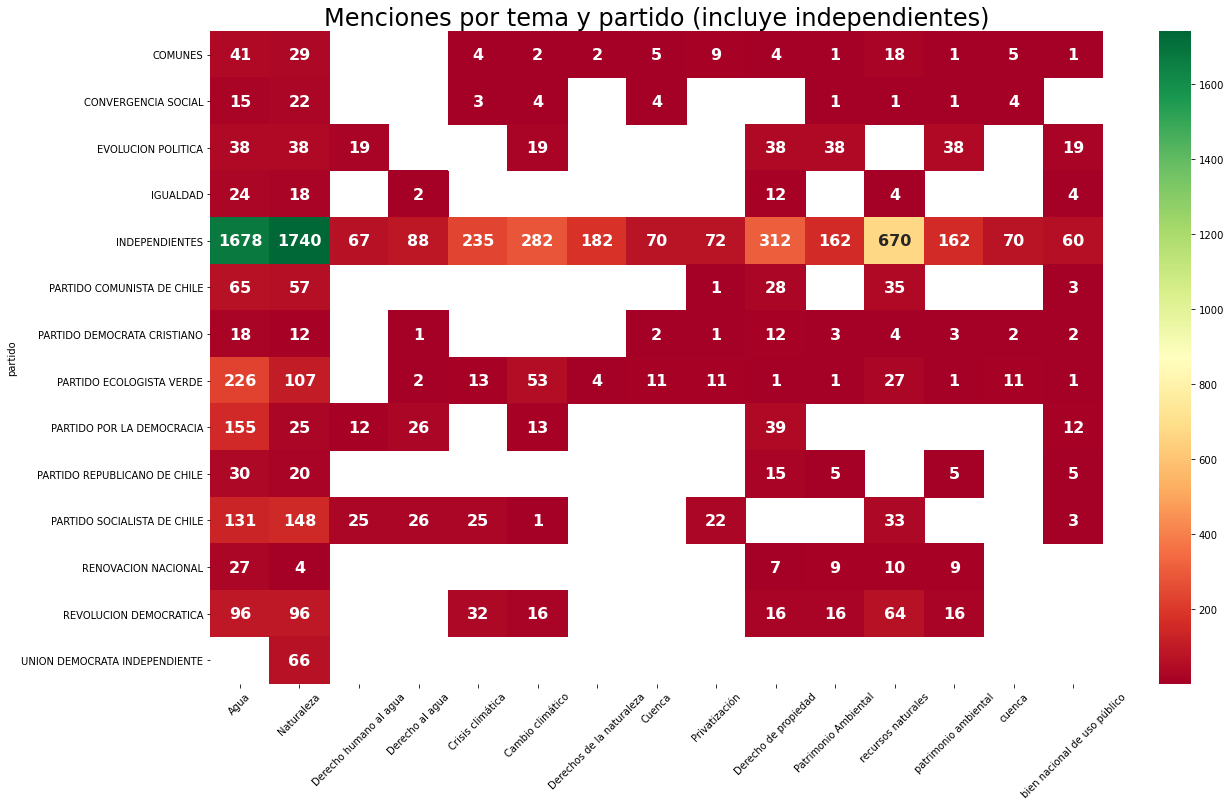

In [114]:
partidos=[k for k,v in sdf.sum(axis=1).to_dict().items() if v>50]
psdf = sdf[sdf.index.isin(partidos)]
fig, ax = plt.subplots(1, figsize=(20,12))
p=sns.heatmap(psdf[temas].replace(0,pd.np.nan), annot=True, annot_kws={'size':16, 'weight': 'bold'}, cmap='RdYlGn', fmt='.0f');
plt.xticks(rotation=45); plt.title('Menciones por tema y partido (incluye independientes)', size=24);

<ipython-input-111-3c11d642b906>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  p=sns.heatmap(psdf[psdf.index!='INDEPENDIENTES'][temas].replace(0, pd.np.nan), annot=True, annot_kws={'size':16, 'weight': 'bold'}, cmap='RdYlGn', fmt='.0f');


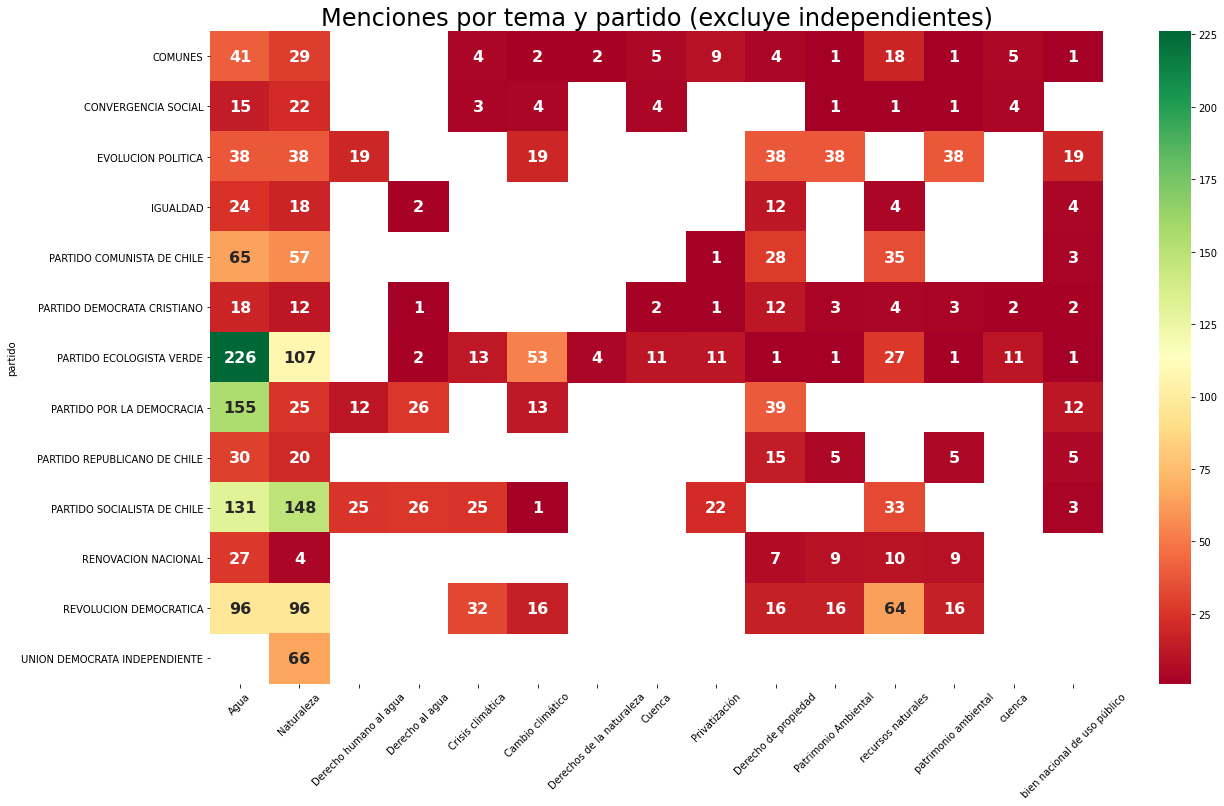

In [111]:
fig, ax = plt.subplots(1, figsize=(20,12))
p=sns.heatmap(psdf[psdf.index!='INDEPENDIENTES'][temas].replace(0, pd.np.nan), annot=True, annot_kws={'size':16, 'weight': 'bold'}, cmap='RdYlGn', fmt='.0f');
plt.xticks(rotation=45); plt.title('Menciones por tema y partido (excluye independientes)', size=24);

IndexError: Inconsistent shape between the condition and the input (got (15, 1) and (15,))

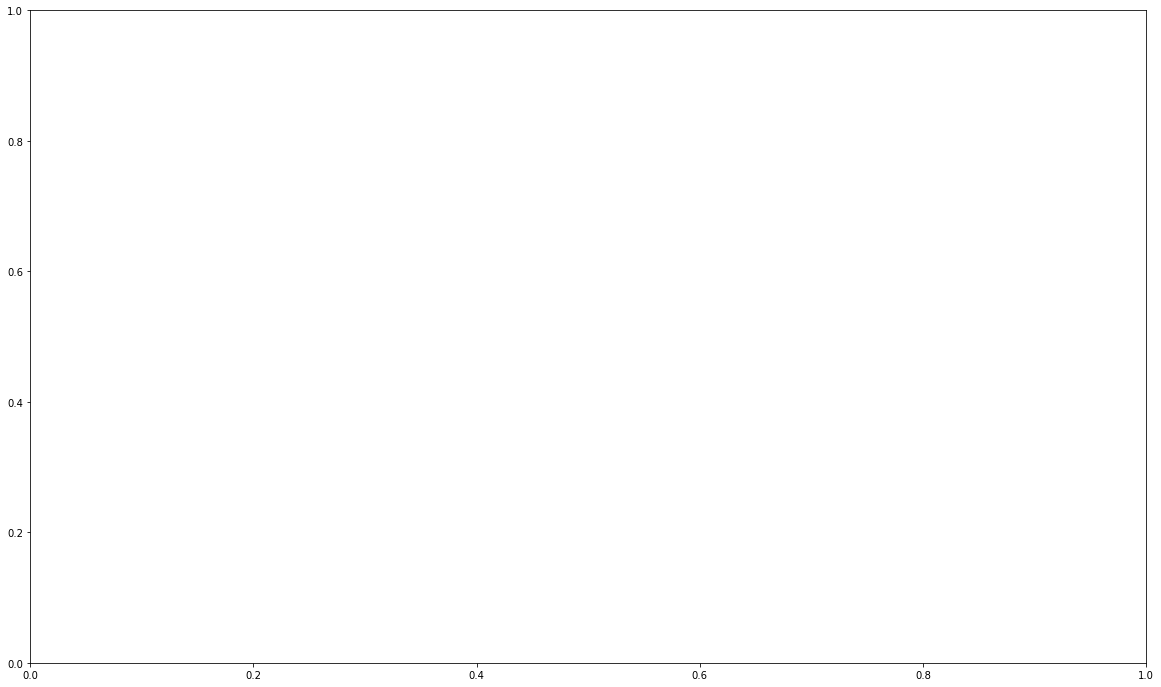

In [84]:
tdf = psdf[psdf.index!='INDEPENDIENTES'][temas]
fig, ax = plt.subplots(1, figsize=(20,12))
p=sns.heatmap(, annot=True, annot_kws={'size':16, 'weight': 'bold'}, cmap='RdYlGn', fmt='.0f');
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Ranking partidos políticos por número total de menciones')

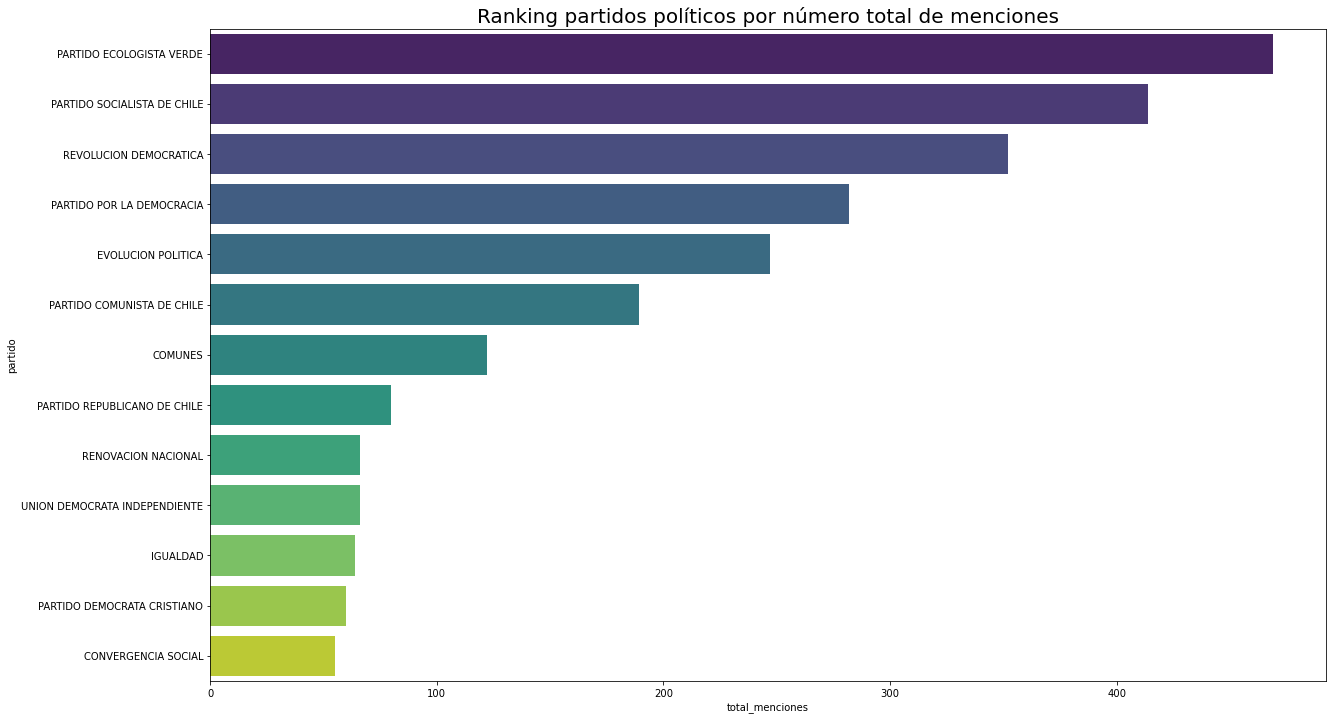

In [115]:
ts = pd.DataFrame(tdf.sum(axis=1).reset_index())
ts.columns = ['partido','total_menciones']
fig,ax = plt.subplots(1, figsize=(20,12))
sns.barplot(x='total_menciones', data=ts.sort_values('total_menciones', ascending=False), y='partido', palette='viridis');
plt.title('Ranking partidos políticos por número total de menciones', size=20)

In [96]:
ts

,partido,menciones
0,COMUNES,122
1,CONVERGENCIA SOCIAL,55
2,EVOLUCION POLITICA,247
3,IGUALDAD,64
4,PARTIDO COMUNISTA DE CHILE,189
5,PARTIDO DEMOCRATA CRISTIANO,60
6,PARTIDO ECOLOGISTA VERDE,469
7,PARTIDO POR LA DEMOCRACIA,282
8,PARTIDO REPUBLICANO DE CHILE,80
9,PARTIDO SOCIALISTA DE CHILE,414


In [ ]:
num=tdf.groupby('partido').size()
num